<a href="https://colab.research.google.com/github/mjuliasm/covid_19/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisando dados de COVID 19**

In [1]:
#Importando as biblotecas

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Lendo o arquivo com as informações disponíveis

covid = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')

In [3]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
#Analisando o tamanho do df
covid.shape

(278238, 8)

In [5]:
#Filtrando os dados para quando os casos acumulados forem números diferentes de 0, ou seja, quando os casos começarem a aparecer

covid = covid[covid['Cumulative_cases'] > 0]


In [6]:
#Vendo a mudança na quantidade de linhas por conta do filtro acima
covid.shape


(250813, 8)

In [7]:
#Colocando a data como índice e ajustando apenas para as colunas que desejamos visualizar

covid = covid.set_index('Date_reported')
covid = covid[['Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']]

## **Análises do Brasil**

In [8]:
#Separando os dados apenas do Brasil

brasil = covid.loc[covid['Country']=='Brazil']

In [9]:
brasil.head()

#Descobrindo primeiro caso (dia 27/02/2020)

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2020-02-27,Brazil,1,1,0,0
2020-02-28,Brazil,0,1,0,0
2020-02-29,Brazil,0,1,0,0
2020-03-01,Brazil,0,1,0,0
2020-03-02,Brazil,1,2,0,0


In [10]:
#Analisando as estatísticas descritivas do dataframe

brasil.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,1119.000000,1.119000e+03,1119.000000,1119.000000
mean,33195.276139,1.925858e+07,625.231457,442349.624665
std,34092.418441,1.273111e+07,730.800296,254734.142677
min,-573.000000,1.000000e+00,0.000000,0.000000
25%,9878.000000,6.361332e+06,110.000000,173468.500000
50%,24468.000000,2.089993e+07,338.000000,583810.000000
75%,45921.500000,3.147695e+07,921.000000,668145.000000
max,298408.000000,3.714551e+07,4249.000000,699634.000000


In [11]:
#Encontrando valor mínimo de novos casos.
#Não existe lógica neste valor ser negativo, logo, vamos excluir da análise

brasil.loc[brasil['New_cases']<0]
brasil.drop(['2021-09-23'], inplace=True)

<ipython-input-11-86be7ebfbeef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brasil.drop(['2021-09-23'], inplace=True)


Quando avaliamos a quantidade de novos casos, temos que a média é 33225 casos por dia e o desvio padrão é um valor maior que a média, ou seja, a distribuição não é homogênea (como já era esperado).

Esse mesmo comportamento acontece com a quantidade de novas mortes registradas.

In [12]:
#Descobrindo primeira morte (19/03/2020)
brasil.loc[brasil['Cumulative_deaths']>0]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2020-03-19,Brazil,57,291,1,1
2020-03-20,Brazil,137,428,3,4
2020-03-21,Brazil,0,428,0,4
2020-03-22,Brazil,476,904,7,11
2020-03-23,Brazil,0,904,0,11
...,...,...,...,...,...
2023-03-17,Brazil,0,37145514,0,699634
2023-03-18,Brazil,0,37145514,0,699634
2023-03-19,Brazil,0,37145514,0,699634


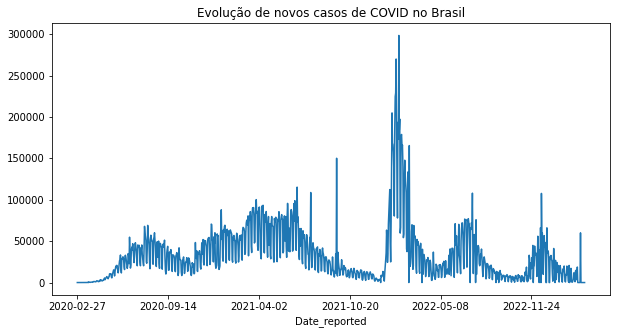

In [13]:
plt.figure(figsize=(10, 5))
brasil['New_cases'].plot()
plt.title('Evolução de novos casos de COVID no Brasil')

plt.show()

In [14]:
#Descobrindo o dia que teve mais casos novos registrados no Brasil

brasil.loc[brasil['New_cases'] == brasil['New_cases'].max()]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2022-02-05,Brazil,298408,26091520,1041,630001


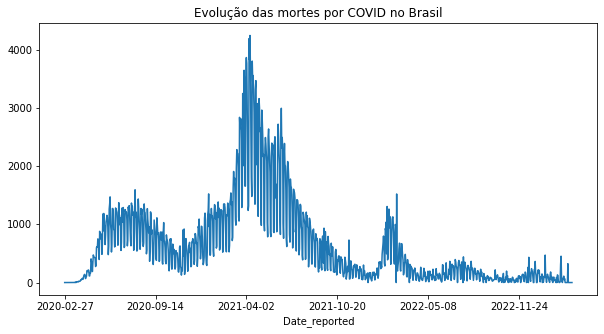

In [15]:
plt.figure(figsize=(10, 5))
brasil['New_deaths'].plot()
plt.title('Evolução das mortes por COVID no Brasil')

plt.show()

In [16]:
#Descobrindo o dia que teve mais mortes registradas no Brasil

brasil.loc[brasil['New_deaths'] == brasil['New_deaths'].max()]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2021-04-10,Brazil,86652,13279857,4249,345025


In [17]:
#Descobrindo quais dias tiveram mais de 3500 mortes por dia

brasil.loc[brasil['New_deaths'] > 3500]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2021-03-28,Brazil,84245,12404414,3650,307112
2021-04-01,Brazil,84494,12658109,3780,317646
2021-04-02,Brazil,90638,12748747,3869,321515
2021-04-03,Brazil,91097,12839844,3769,325284
2021-04-08,Brazil,86979,13100580,4195,336947
2021-04-09,Brazil,92625,13193205,3829,340776
2021-04-10,Brazil,86652,13279857,4249,345025
2021-04-11,Brazil,93317,13373174,3693,348718
2021-04-15,Brazil,82186,13599994,3808,358425


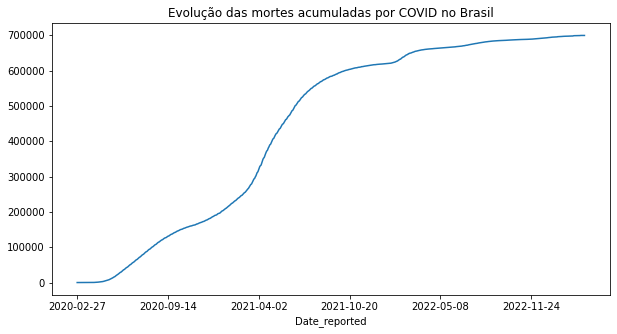

In [18]:
plt.figure(figsize=(10, 5))
brasil['Cumulative_deaths'].plot()
plt.title('Evolução das mortes acumuladas por COVID no Brasil')

plt.show()

## **Análise de todos os países** 




In [19]:
covid = covid.reset_index()

# Buscando a informação mais recente do dataframe
covid_final = covid.loc[covid['Date_reported'] == covid['Date_reported'].max()]

In [20]:
#Descobrindo qual país teve maior quantidade de mortes

covid_final.loc[covid_final['Cumulative_deaths']  == covid_final['Cumulative_deaths'].max()]

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
240240,2023-03-21,United States of America,0,102544598,0,1114970


In [21]:
#Calculando % de mortes por contaminação

covid_final['% Deaths/Cases'] = (covid_final ['Cumulative_deaths'] / covid_final['Cumulative_cases'])*100

<ipython-input-21-fdf62abde8ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_final['% Deaths/Cases'] = (covid_final ['Cumulative_deaths'] / covid_final['Cumulative_cases'])*100


In [22]:
#Descobrindo qual país teve maior taxa de mortalidade

covid_final.loc[covid_final['% Deaths/Cases']  == covid_final['% Deaths/Cases'].max()]

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,% Deaths/Cases
248618,2023-03-21,Yemen,0,11945,0,2159,18.074508


In [23]:
#País com a menor taxa de letalidade

covid_final.loc[covid_final['% Deaths/Cases'] == covid_final['% Deaths/Cases'].min()]

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,% Deaths/Cases
74097,2023-03-21,Falkland Islands (Malvinas),0,1923,0,0,0.0
100796,2023-03-21,Holy See,0,26,0,0,0.0
164225,2023-03-21,Niue,0,747,0,0,0.0
178439,2023-03-21,Pitcairn Islands,0,4,0,0,0.0
192044,2023-03-21,"Saint Helena, Ascension and Tristan da Cunha",0,2166,0,0,0.0
229398,2023-03-21,Tokelau,0,5,0,0,0.0
234626,2023-03-21,Tuvalu,0,2779,0,0,0.0


In [32]:
#Ordenando por % de mortes e novos casos

covid_final = covid_final.sort_values(by='% Deaths/Cases', ascending=False)

In [33]:
#Resetando o índice e retirando a coluna index do dataframe

covid_final = covid_final.reset_index()

In [34]:
covid_final.drop(columns=['index'], inplace=True)

In [35]:
covid_final.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,% Deaths/Cases
0,2023-03-21,Yemen,0,11945,0,2159,18.074508
1,2023-03-21,Sudan,0,63899,0,5026,7.865538
2,2023-03-21,Syrian Arab Republic,0,57423,0,3163,5.508246
3,2023-03-21,Somalia,0,27334,0,1361,4.979147
4,2023-03-21,Peru,0,4489377,0,219648,4.892617


In [37]:
covid_final.loc[covid_final['Country'] == 'Brazil']

#Brasil foi o 49º país com a maior taxa de mortalidade de COVID

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,% Deaths/Cases
49,2023-03-21,Brazil,0,37145514,0,699634,1.883495


In [42]:
covid_morte = covid.sort_values(by='Date_reported', ascending=False)

covid_morte.loc[covid_morte['New_deaths'] >0]

#Tivemos 32 mortes registradas na Polônia no dia 21 de março de 2023 (data mais recente de morte registrada)

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
179552,2023-03-21,Poland,4200,6477600,32,119170
203909,2023-03-21,Serbia,1039,2509089,5,17932
111979,2023-03-21,Israel,540,4809664,2,12370
132372,2023-03-21,Lithuania,560,1311432,1,9617
180667,2023-03-21,Portugal,89,5573509,8,26362
...,...,...,...,...,...,...
46033,2020-01-21,China,93,295,2,6
46032,2020-01-20,China,77,202,1,4
46031,2020-01-19,China,76,125,1,3
46029,2020-01-17,China,4,49,1,2


In [45]:
morte_brasil = covid_morte.loc[covid_morte['Country'] == 'Brazil']
morte_brasil.loc[morte_brasil['New_deaths'] > 0]

# No Brasil, o último registro de mortes de COVID foi dia 12 de março de 2023, com 324 registros. Depois dia 05 de março de 67.

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
31577,2023-03-12,Brazil,59994,37145514,324,699634
31570,2023-03-05,Brazil,18729,37085520,67,699310
31569,2023-03-04,Brazil,3327,37066791,46,699243
31568,2023-03-03,Brazil,10528,37063464,110,699197
31567,2023-03-02,Brazil,14706,37052936,81,699087
...,...,...,...,...,...,...
30495,2020-03-25,Brazil,345,1891,9,34
30494,2020-03-24,Brazil,642,1546,14,25
30492,2020-03-22,Brazil,476,904,7,11
30490,2020-03-20,Brazil,137,428,3,4
